### practical 7

Objective:
Conduct a survey and collect data from a sample population, ensuring proper sampling techniques.
Use the Central Limit Theorem (CLT) to analyze the sampling distribution of a sample mean and estimate population parameters.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate population data (customer transaction amounts in ₹)
np.random.seed(42)
population_data = np.random.exponential(scale=500, size=10000)  # Right-skewed distribution

# Convert to DataFrame
df = pd.DataFrame(population_data, columns=['Transaction_Amount'])

# Display basic statistics
df.describe()


,Transaction_Amount
count,10000.000000
mean,488.749477
std,487.202353
min,0.005817
25%,141.399586
50%,339.157479
75%,673.549148
max,4086.222799


In [ ]:
# Give your inference

In [2]:
from scipy.stats import norm

# Simple Random Sampling (SRS)
sample_size = 50
simple_random_sample = np.random.choice(population_data, sample_size, replace=False)

# Systematic Sampling
interval = len(population_data) // sample_size
systematic_sample = population_data[::interval][:sample_size]

# Stratified Sampling (Assume customers are grouped into low, mid, high spenders)
df['Spending_Category'] = pd.qcut(df['Transaction_Amount'], q=3, labels=['Low', 'Medium', 'High'])
strata_samples = df.groupby('Spending_Category', group_keys=False).apply(lambda x: x.sample(sample_size // 3))

# Display samples
print("Simple Random Sample Mean:", np.mean(simple_random_sample))
print("Systematic Sample Mean:", np.mean(systematic_sample))
print("Stratified Sample Mean:", strata_samples['Transaction_Amount'].mean())


Simple Random Sample Mean: 504.0749240985955
Systematic Sample Mean: 409.44244407722266
Stratified Sample Mean: 535.6017613258537


In [ ]:
# Give your inference

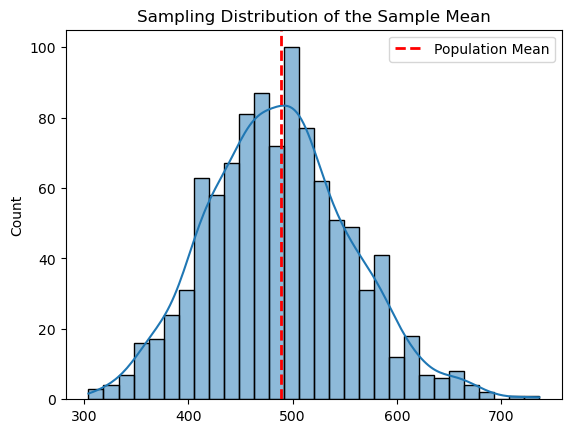

In [3]:
sample_means = []  # Store means of samples
num_samples = 1000  # Number of samples to take
sample_size = 50  # Each sample size

for _ in range(num_samples):
    sample = np.random.choice(population_data, sample_size, replace=False)
    sample_means.append(np.mean(sample))

# Plot the sampling distribution
sns.histplot(sample_means, bins=30, kde=True)
plt.axvline(np.mean(population_data), color='red', linestyle='dashed', linewidth=2, label="Population Mean")
plt.legend()
plt.title("Sampling Distribution of the Sample Mean")
plt.show()


In [ ]:
# Give your inference

In [4]:
import scipy.stats as stats

# Sample mean and standard deviation
sample_mean = np.mean(sample_means)
sample_std = np.std(sample_means)

# 95% Confidence Interval
confidence_level = 0.95
z_critical = norm.ppf((1 + confidence_level) / 2)  # Z-score for 95% CI
margin_of_error = z_critical * (sample_std / np.sqrt(sample_size))

lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print(f"Estimated Population Mean: {sample_mean:.2f}")
print(f"95% Confidence Interval: ({lower_bound:.2f}, {upper_bound:.2f})")


Estimated Population Mean: 487.27
95% Confidence Interval: (468.37, 506.16)


In [ ]:
# Give your inference